In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv("UberDataset.csv")
data.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
data.shape


(1156, 7)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
data['PURPOSE'].fillna("NOT", inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_20352\975754463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna("NOT", inplace=True)


In [10]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], 
									errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], 
									errors='coerce')


In [11]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [12]:
from datetime import datetime

data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour

#changing into categories of day and night
data['day-night'] = pd.cut(x=data['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


In [13]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN,NaN


In [14]:
data.dropna(inplace=True)


In [15]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


In [16]:
data.drop_duplicates(inplace=True)


In [17]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


Data Visualization


In this section, we will try to understand and compare all columns.

Let’s start with checking the unique values in dataset of the columns with object datatype.

In [18]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = data[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

C:\Users\dell\AppData\Local\Temp\ipykernel_20352\634443611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['CATEGORY'], palette='Set3')


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

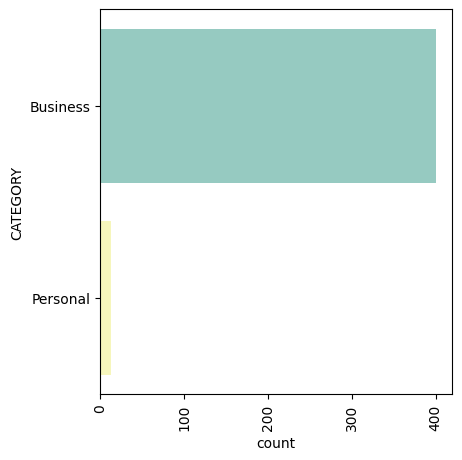

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data['CATEGORY'], palette='Set3')
plt.xticks(rotation=90)



C:\Users\dell\AppData\Local\Temp\ipykernel_20352\1525433341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['PURPOSE'], palette='Set3')  # Change palette to any seaborn color palette you prefer


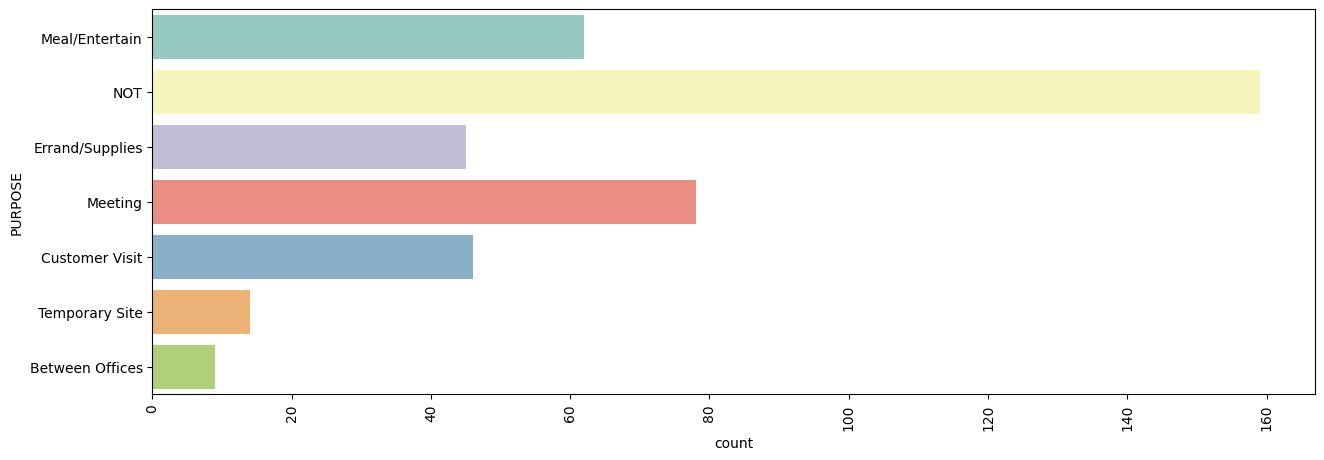

In [38]:
plt.figure(figsize=(15,5))

# Create the countplot with seaborn
sns.countplot(data['PURPOSE'], palette='Set3')  # Change palette to any seaborn color palette you prefer

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20352\1504370051.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['day-night'], palette='Set3')


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

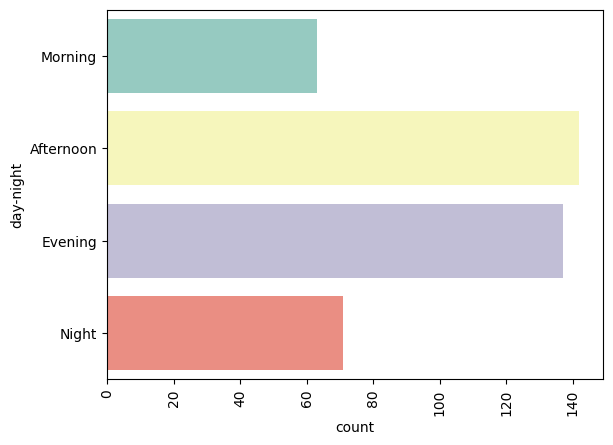

In [36]:
sns.countplot(data['day-night'], palette='Set3')
plt.xticks(rotation=90)


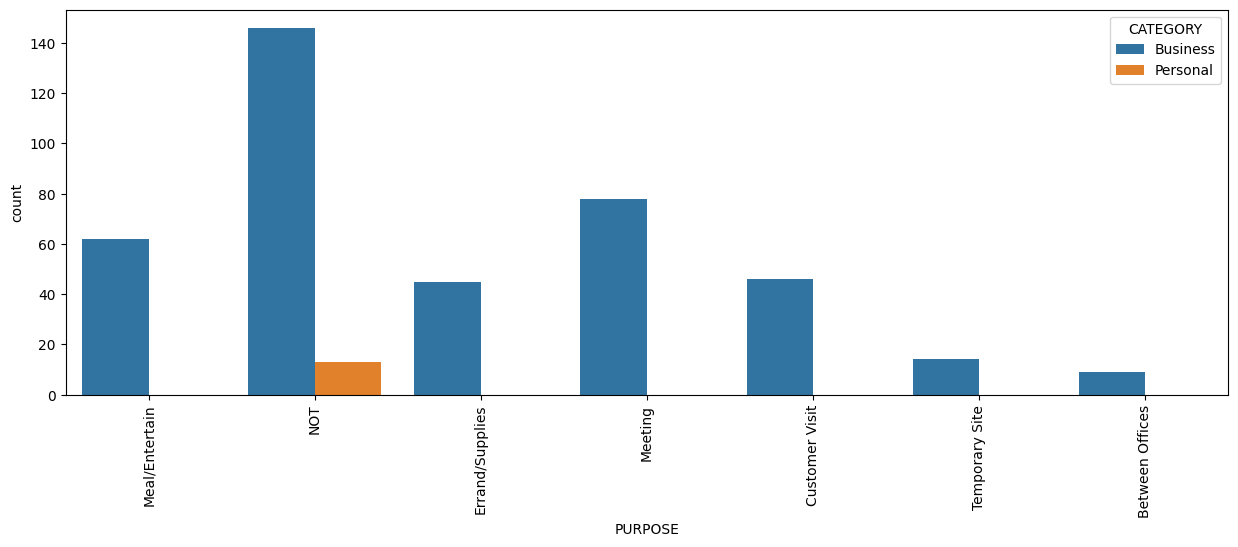

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


Insights from the above count-plots : 

Most of the rides are booked for business purpose.

Most of the people book cabs for Meetings and Meal / Entertain purpose.

Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

As we have seen that CATEGORY and PURPOSE columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [56]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder()
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]).toarray())
OH_cols.index = data.index

In [60]:
string_columns = data.select_dtypes(include=['object', 'category']).columns

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data[string_columns] = data[string_columns].apply(lambda col: le.fit_transform(col))

In [64]:
corr_matrix = data.corr()

<Axes: >

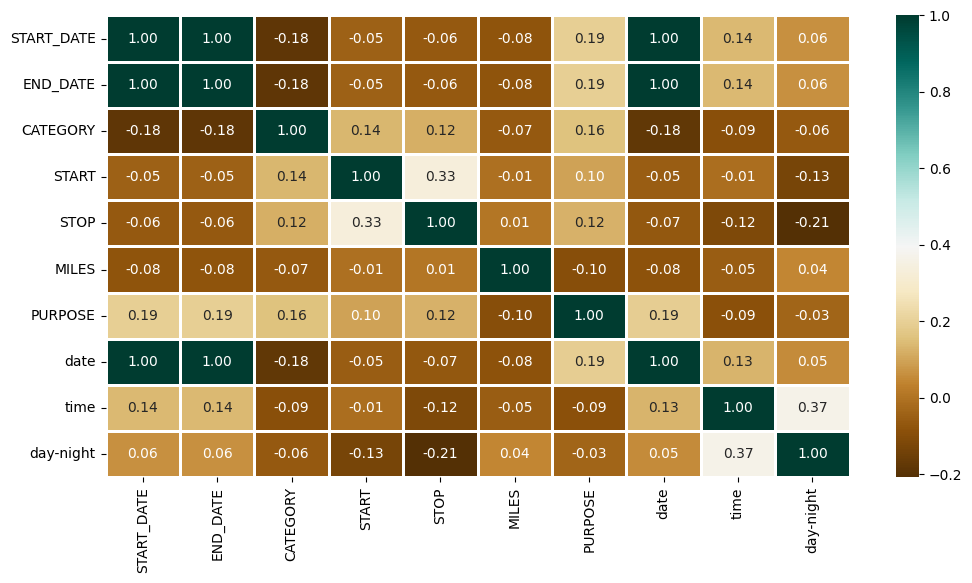

In [65]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

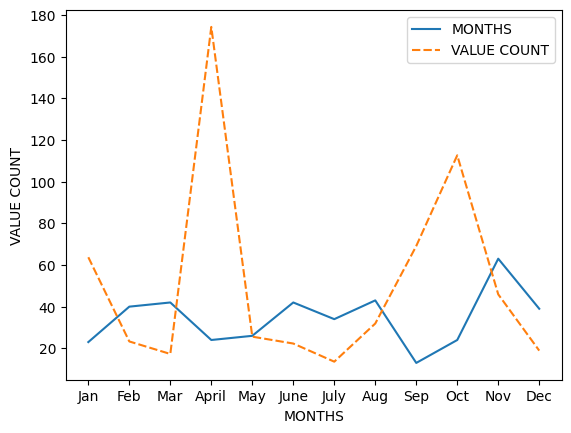

In [66]:
data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": data.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [67]:
data['DAY'] = data.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
data['DAY'] = data['DAY'].map(day_label)


In [68]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,30,28,5.1,3,0,21.0,3,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,30,28,5.0,5,1,1.0,2,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,30,28,4.8,2,1,20.0,3,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,30,28,4.7,4,2,17.0,1,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,30,106,63.7,1,3,14.0,0,Jan,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,0,8,9,3.1,2,112,13.0,0,Dec,Mon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,0,8,1,4.4,3,112,13.0,0,Dec,Mon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,0,1,9,4.7,1,112,14.0,0,Dec,Mon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,0,8,56,3.0,3,112,17.0,1,Dec,Mon


C:\Users\dell\AppData\Local\Temp\ipykernel_20352\788521460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_label.index, y=day_label.values, palette=custom_palette)
C:\Users\dell\AppData\Local\Temp\ipykernel_20352\788521460.py:4: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=day_label.index, y=day_label.values, palette=custom_palette)


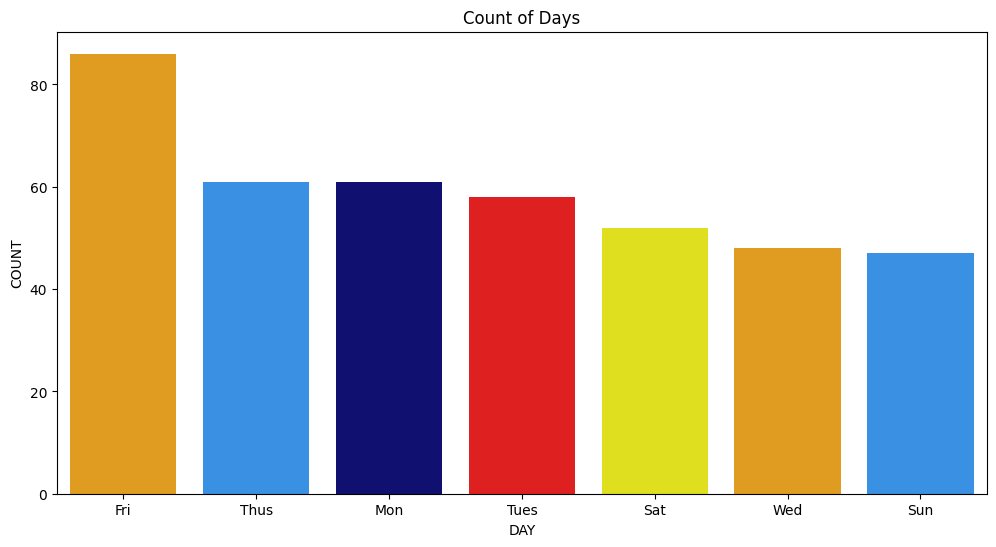

In [74]:
custom_palette = ['orange', 'dodgerblue', 'navy', 'red', 'yellow']

plt.figure(figsize=(12, 6))
sns.barplot(x=day_label.index, y=day_label.values, palette=custom_palette)

plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.title('Count of Days')

plt.show()

<Axes: ylabel='MILES'>

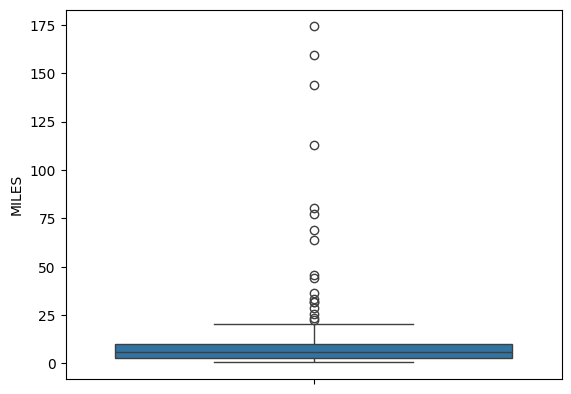

In [75]:
sns.boxplot(data['MILES'])


<Axes: ylabel='MILES'>

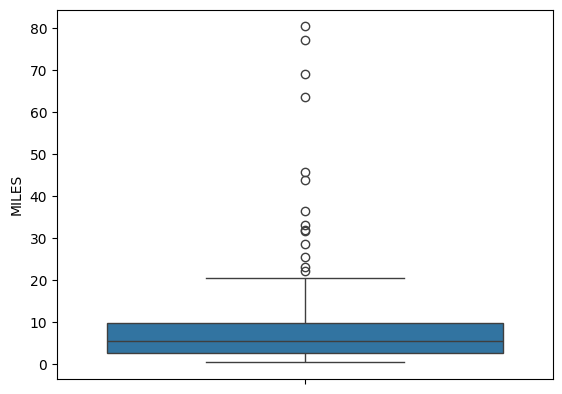

In [76]:
sns.boxplot(data[data['MILES']<100]['MILES'])


It’s bit visible. But to get more clarity we can use distplot for values less than 40.

<Axes: xlabel='MILES', ylabel='Count'>

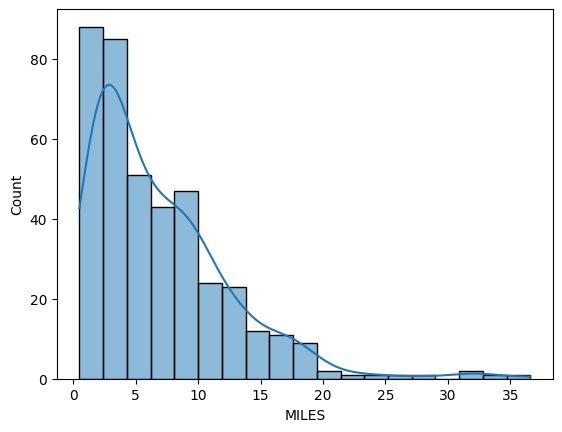

In [82]:
sns.histplot(data[data['MILES']<40]['MILES'],kde=True)
